<a href="https://colab.research.google.com/github/felipequinto/Data_Mining/blob/main/mushroom_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classificação de Cogumelos

Base: https://www.kaggle.com/uciml/mushroom-classification

## Carregar base de Dados

In [ ]:
# Importação dos pacotes
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
# Importando a base
data = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/materia_ANALISE_EXPLORATORIA/mushrooms.xlsx')

In [ ]:
# Visualizando o dataframe
data.head()

,cap.shape,cap.surface,cap.color,bruises,odor,gill.attachment,gill.spacing,gill.size,gill.color,stalk.shape,...,stalk.surface.below.ring,stalk.color.above.ring,stalk.color.below.ring,veil.color,ring.number,ring.type,spore.print.color,population,habitat.,class
0,BELL,SCALY,BUFF,BRUISES,NONE,FREE,CLOSE,BROAD,WHITE,ENLARGING,...,SMOOTH,WHITE,WHITE,WHITE,TWO,PENDANT,GREEN,SEVERAL,GRASSES,POISONOUS
1,CONVEX,SMOOTH,WHITE,NO,NONE,FREE,CROWDED,BROAD,BROWN,TAPERING,...,SMOOTH,WHITE,WHITE,WHITE,ONE,EVANESCENT,BLACK,ABUNDANT,GRASSES,EDIBLE
2,FLAT,SMOOTH,WHITE,NO,NONE,FREE,CROWDED,BROAD,BROWN,TAPERING,...,SMOOTH,WHITE,WHITE,WHITE,ONE,EVANESCENT,BLACK,ABUNDANT,GRASSES,EDIBLE
3,CONVEX,FIBROUS,BROWN,NO,NONE,FREE,CLOSE,NARROW,BLACK,ENLARGING,...,SMOOTH,WHITE,WHITE,WHITE,ONE,PENDANT,BROWN,SOLITARY,URBAN,EDIBLE
4,FLAT,FIBROUS,BROWN,BRUISES,NONE,FREE,CLOSE,BROAD,BROWN,TAPERING,...,SMOOTH,WHITE,PINK,WHITE,ONE,PENDANT,BROWN,SOLITARY,WOODS,EDIBLE


In [ ]:
# Resumo estatístico
data.describe().T

,count,unique,top,freq
cap.shape,5936,6,CONVEX,2980
cap.surface,5936,4,FIBROUS,2300
cap.color,5936,8,GRAY,1952
bruises,5936,2,BRUISES,3184
odor,5936,7,NONE,3056
gill.attachment,5936,2,FREE,5912
gill.spacing,5936,2,CLOSE,4632
gill.size,5936,2,BROAD,5208
gill.color,5936,9,PINK,1448
stalk.shape,5936,2,TAPERING,3136


## Análise exploratória

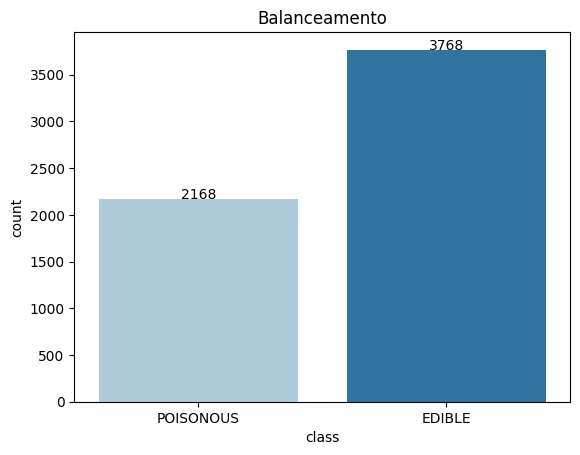

In [ ]:
# Balanceamento
graph = sns.countplot(data=data, x='class',hue='class', palette='Paired')
plt.title('Balanceamento')

for idx, bar in enumerate(graph.patches):
  height = bar.get_height()
  graph.text(x=bar.get_x() + bar.get_width()/2., y=height + 0.1, s=(data['class'].value_counts()).sort_values()[idx], ha="center")

plt.show()

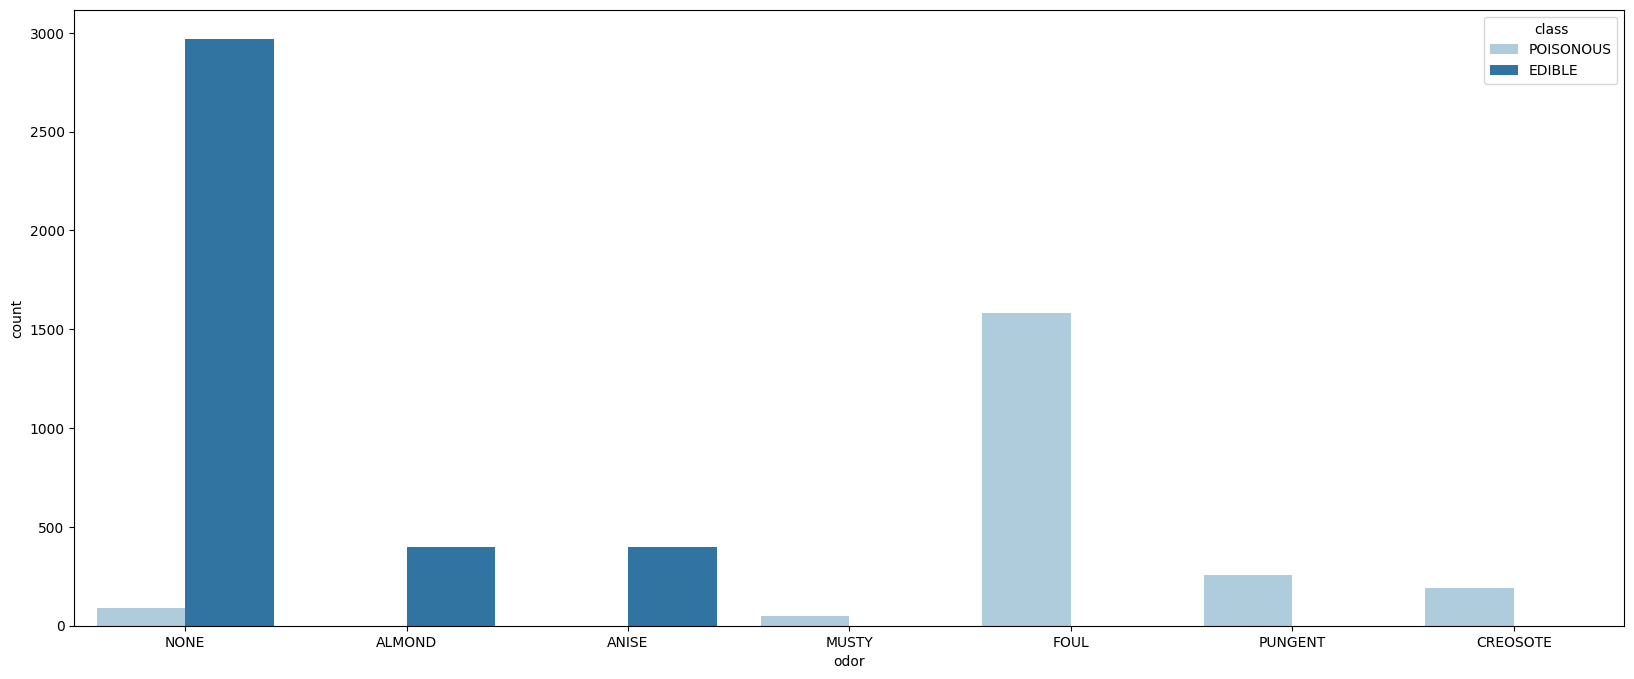

In [ ]:
# Atributo odor
plt.figure(figsize=(20,8))
sns.countplot(data=data, x='odor', hue='class', palette='Paired')
plt.show()

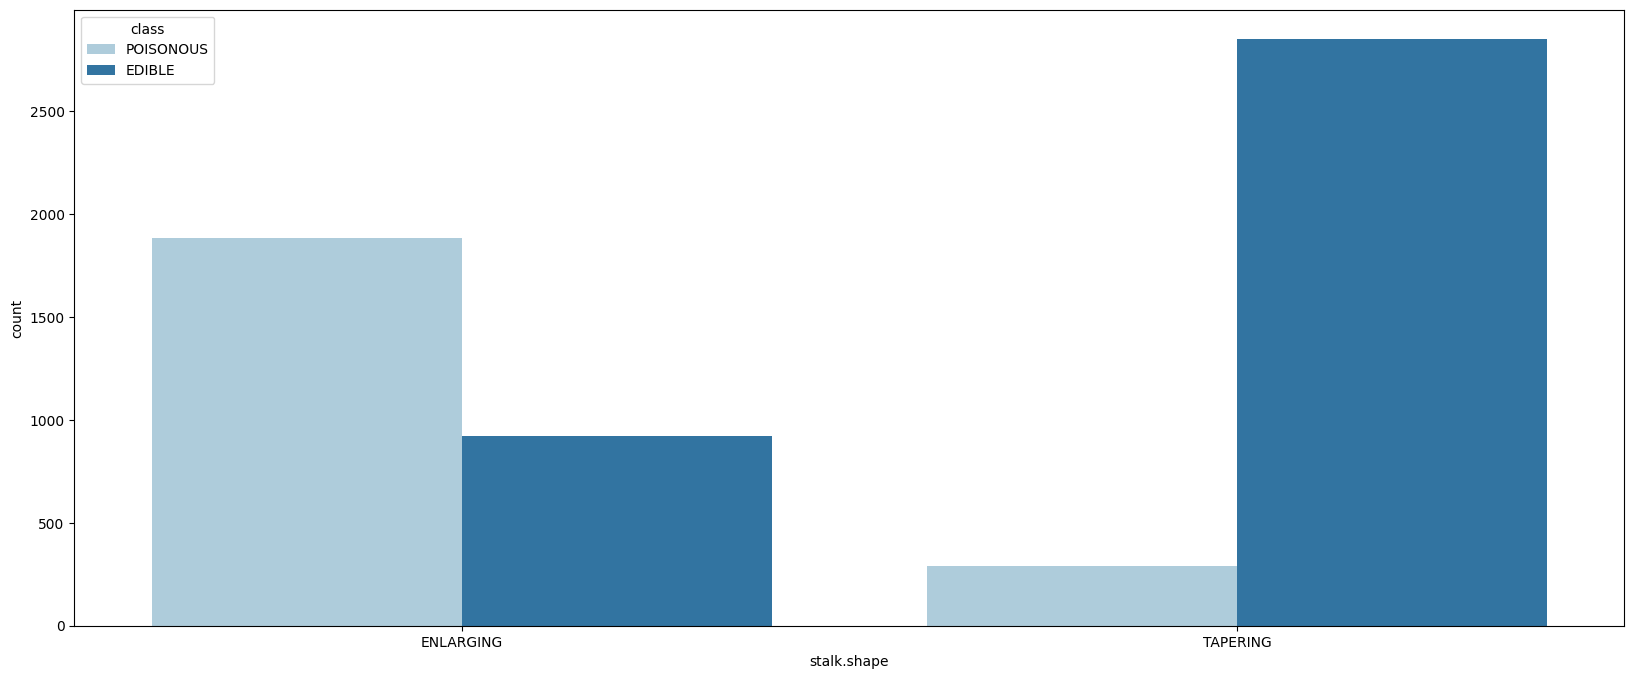

In [ ]:
# Atributo stalk.shape
plt.figure(figsize=(20,8))
sns.countplot(data=data, x='stalk.shape', hue= 'class', palette='Paired')
plt.show()

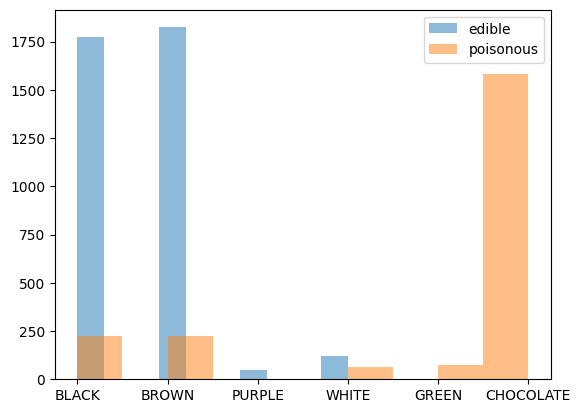

In [ ]:
# Verificando a influência da cor nas classes
edible = data[data['class'] == 'EDIBLE']
poisonous = data[data['class'] =='POISONOUS']

plt.hist(edible['spore.print.color'], alpha=0.5, label='edible')
plt.hist(poisonous['spore.print.color'], alpha=0.5, label='poisonous')
plt.legend()
plt.show()

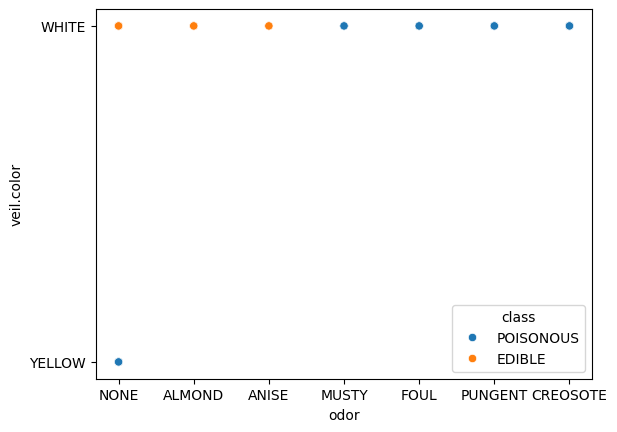

In [ ]:
# Gráfico de dispersão para visualizar relação entre a variável 'odor' e 'veil.color'
sns.scatterplot(data=data, x='odor', y='veil.color', hue='class')
plt.show()

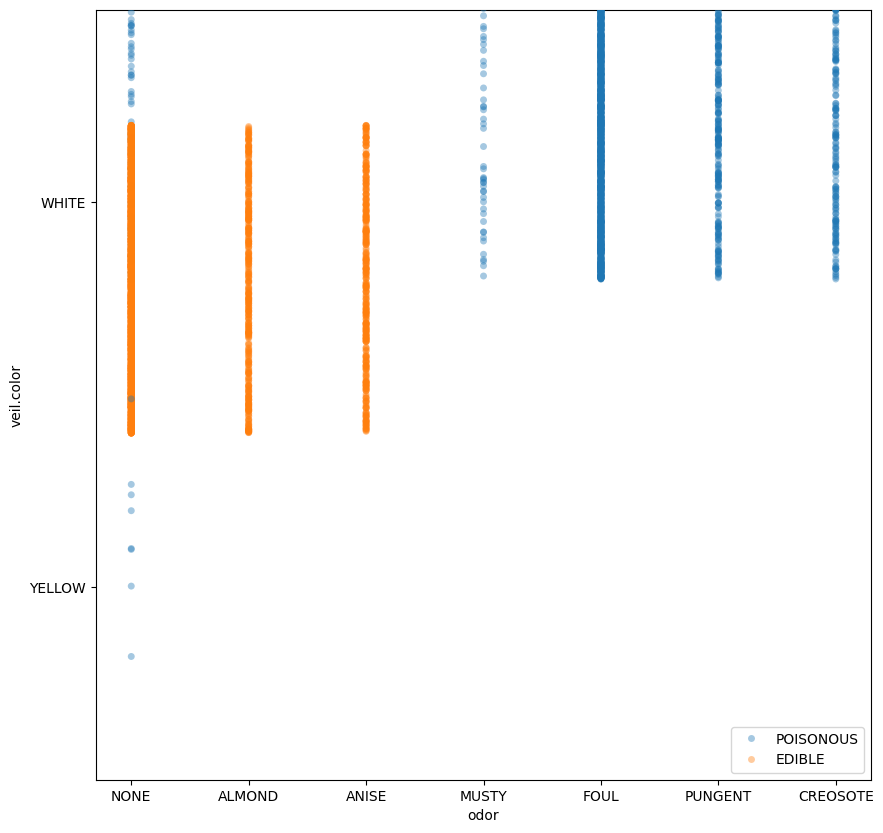

In [ ]:
# Gráfico de stripplot, relação entre as variáveis 'odor' e 'veil.color' para diferentes classes de cogumelos ('class')
plt.figure(figsize=(10,10))
sns.stripplot(data=data, x='odor', y='veil.color', hue='class', jitter=0.8, dodge=True, orient='h', alpha=0.4)

plt.legend(loc='lower right')
plt.show()

# Machine Learning

## Separação das bases em treino e teste

In [ ]:
# Semente para reprodução de resultados
seed=10000

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data.loc[:, data.columns !='class'], data['class'], test_size=0.2, stratify=data['class'], random_state=seed)

print('shape input de treino:', X_train.shape)
print('shape input de treste', X_test.shape)
print('shape output de treino:', y_train.shape)
print('shape output de treino:', y_test.shape)


shape input de treino: (4748, 21)
shape input de treste (1188, 21)
shape output de treino: (4748,)
shape output de treino: (1188,)


In [ ]:
# Verifica proporções, amostragem estratificada
data['class'].value_counts()

EDIBLE       3768
POISONOUS    2168
Name: class, dtype: int64

In [ ]:
# Treino
print(0.8 * data['class'].value_counts()[0])
print(0.8 * data['class'].value_counts()[1])

# Teste
print(0.2 * data['class'].value_counts()[0])
print(0.2 * data['class'].value_counts()[0])

3014.4
1734.4
753.6
753.6


## Árvore de Decisão

In [ ]:
# Transformar inputs categóricos em numéricos: dummy coding
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(drop='first')
encoder.fit(X_train)
X_train = encoder.transform(X_train)
X_test = encoder.transform(X_test)

In [ ]:
X_train.shape

(4748, 76)

In [ ]:
# Treina modelo
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(min_samples_leaf=5, random_state=seed)
model.fit(X_train, y_train);

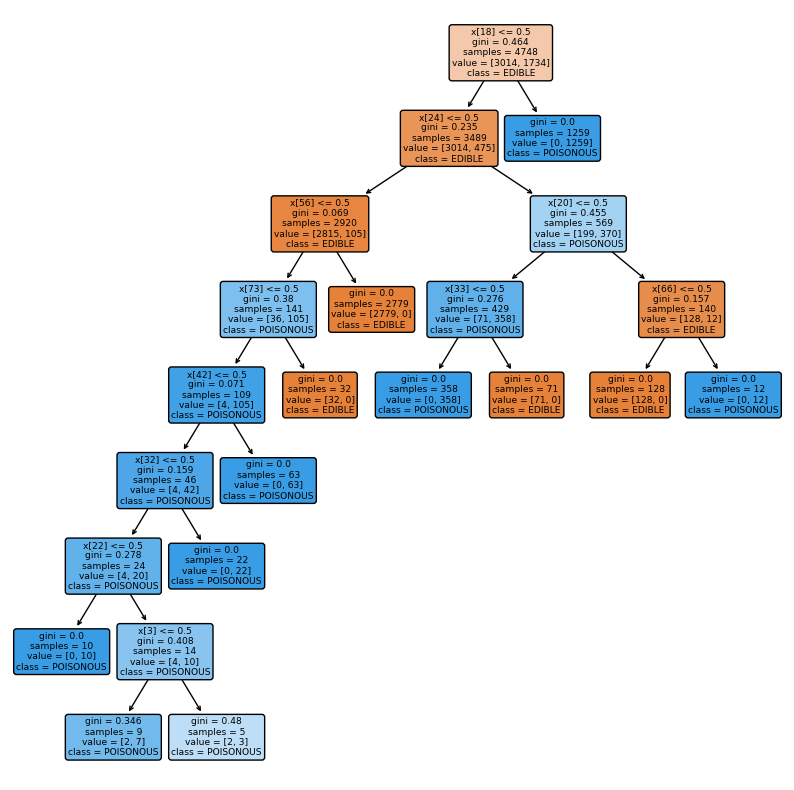

In [ ]:
# Visualização gráfica da árvore de decisão
from sklearn import tree
fig, ax = plt.subplots(figsize=(10, 10))
tree.plot_tree(model, class_names=y_train.unique(), filled=True, rounded=True);

In [ ]:
# Métrica de treino
model.score(X_train, y_train)

0.9991575400168492

In [ ]:
# Avaliando modelo treinado na base de teste
model.score(X_test, y_test) # Acurácia

0.9966329966329966

In [ ]:
# Inferência do teste
y_pred = model.predict(X_test)

In [ ]:
# Calcula os elementos únicos e suas contagens no array y_test
unique_elements, counts_elements = np.unique(y_test, return_counts=True)
print('Frequência:')
print(np.asarray((unique_elements, counts_elements)))

Frequência:
[['EDIBLE' 'POISONOUS']
 [754 434]]


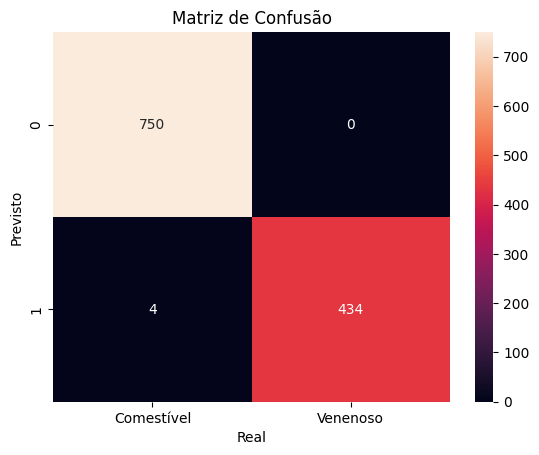

In [ ]:
#Gera um heatmap da matriz de confusão
ax = plt.subplot()
sns.heatmap(confMatrix, annot=True, fmt=".0f")
plt.xlabel('Real')
plt.ylabel('Previsto')
plt.title('Matriz de Confusão')

ax.xaxis.set_ticklabels(['Comestível', 'Venenoso'])
ax.xaxis.set_ticklabels(['Comestível', 'Venenoso'])
plt.show()

In [ ]:
# Cria um DataFrame para visualização mais legível da matriz de confusão
from sklearn.metrics import confusion_matrix
confMatrix = confusion_matrix(y_pred, y_test)
pd.DataFrame(confMatrix, index=['Previsto comestível', 'Previsto venenoso'], columns=['Real comestível', 'Real venenoso'])

,Real comestível,Real venenoso
Previsto comestível,750,0
Previsto venenoso,4,434
